installing fastai 

In [ ]:
 pip install -Uqq fastai

#Classifying images using cnn_learner/vision learner

In [ ]:
from fastai.vision.all import *

Downloading the dataset

In [ ]:
pathurl = untar_data(URLs.PETS)

Checking the contents of what the path holds

In [ ]:
pathurl.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

fetching all the images from the path using the get_image_files()function

In [ ]:
files = get_image_files(pathurl/"images")
len(files)
     

7390

Trying to understand the names of the pets and find that the dog names start with lower case wheareas the cat names start in uppercase

In [ ]:
files[0],files[1]

(Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_57.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_109.jpg'))

defining the label function to label the cast as True and dog as False

In [ ]:
def label_function(f): return f[0].isupper()

Uploading the data into a data loader object.

In [ ]:
datals = ImageDataLoaders.from_name_func(pathurl, files, label_function, item_tfms=Resize(224))

the show_batch displays True for Cats and False for dogs

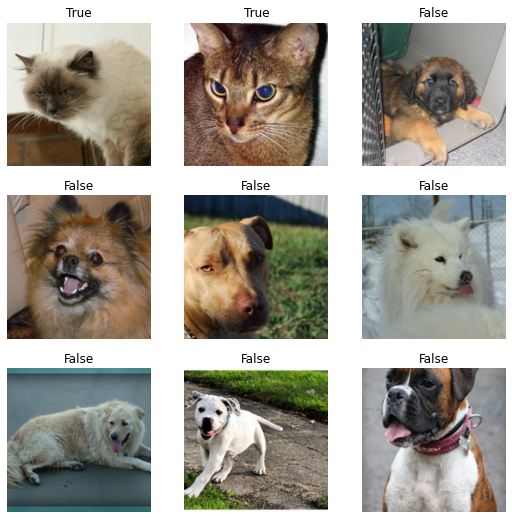

In [ ]:
datals.show_batch()

In [ ]:
#learning = cnn_learner(datals, resnet34, metrics=error_rate)
#learning.fine_tune(1)
     

Using learner to combine the data and model for training.

In [ ]:
learn = vision_learner(datals, resnet34, metrics=error_rate)
learn.fine_tune(1)
     

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.151877,0.018980,0.007442,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.059461,0.012718,0.004736,00:51


In [ ]:
learn.predict(files[3])

('True', TensorBase(1), TensorBase([4.3519e-13, 1.0000e+00]))

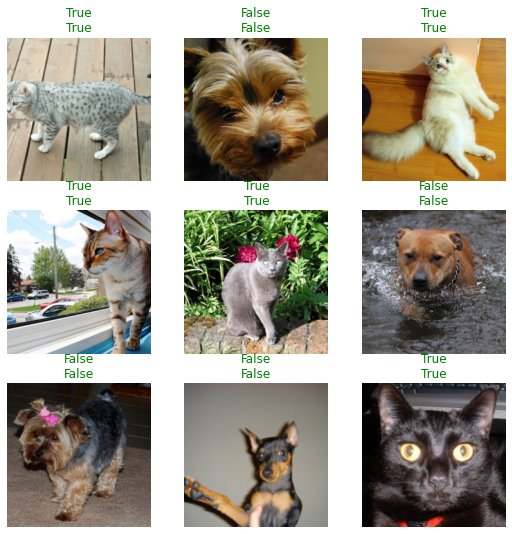

In [ ]:
learn.show_results()

#Segmentation using unet_learner
predicting category for each pixel of the image


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

the images are in the images folder and the segmentation is present in the labels.

In [ ]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [ ]:
filenames = get_image_files(path/"images")
filenames[0]
     

Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f00000.png')

In [ ]:

(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f02550_P.png')

In [ ]:
def label_function(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [ ]:
datals = SegmentationDataLoaders.from_label_func(path, bs=8, fnames = filenames, label_func = label_function, codes = codes)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.memory_allocated() 
torch.cuda.memory_cached()

/usr/local/lib/python3.8/dist-packages/torch/cuda/memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


1138753536

In [ ]:
torch.cuda.max_memory_allocated()  
torch.cuda.memory_allocated() 


390942720

In [ ]:
#torch.cuda.set_memory_growth(True)


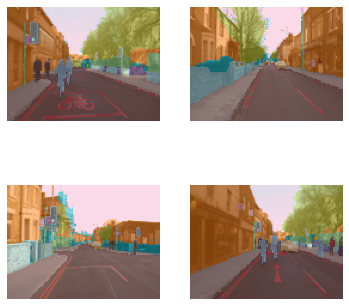

In [ ]:
datals.show_batch(max_n=4)
     

In [ ]:
#import torch
#torch.cuda.empty_cache()

In [ ]:
#torch.cuda.memory_summary(device=None, abbreviated=False)

In [ ]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES']='2, 3'

In [ ]:
# import gc
# def report_gpu():
#   print(torch.cuda.list_gpu_processes())
#   gc.collect()
#    torch.cuda.empty_cache()

In [ ]:
#import gc
#gc.collect()
#torch.cuda.empty_cache()

In [ ]:
# pip install koila

In [ ]:
# !pip install GPUtil

In [ ]:
# import torch
# torch.cuda.empty_cache()

In [ ]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()
# cuda.select_device(0)

In [ ]:
# !pip install GPUtil

# import torch
# from GPUtil import showUtilization as gpu_usage
# from numba import cuda

# def free_gpu_cache():
#     print("Initial GPU Usage")
#     gpu_usage()                             

#     torch.cuda.empty_cache()

#     cuda.select_device(0)
#     cuda.close()
#     cuda.select_device(0)

#     print("GPU Usage after emptying the cache")
#     gpu_usage()

# free_gpu_cache()               

In [ ]:
# import os
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [ ]:
# !nvidia-smi

In [ ]:
# !cat /usr/local/cuda/version.txt

In [ ]:
#  %env CUDA_LAUNCH_BLOCKING=1

In [ ]:
# !nvcc --version

In [ ]:
# !pip show torch

In [ ]:
# torch.cuda.empty_cache()

In [ ]:
#(input, label) = lazy(input, label, batch=0)

In [ ]:
learn = unet_learner(datals, resnet34)  
learn.fine_tune(4)   

epoch,train_loss,valid_loss,time
0,2.705378,2.318840,00:01


epoch,train_loss,valid_loss,time
0,1.598930,1.625193,00:01
1,1.432876,1.367558,00:01
2,1.276794,1.131061,00:01
3,1.158822,1.051316,00:01


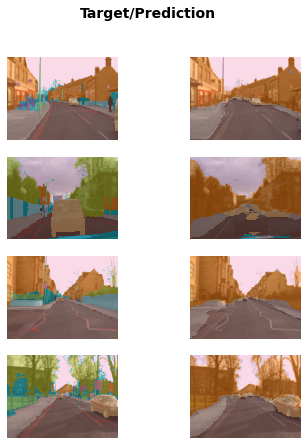

In [ ]:

learn.show_results(max_n=4, figsize=(6,7))

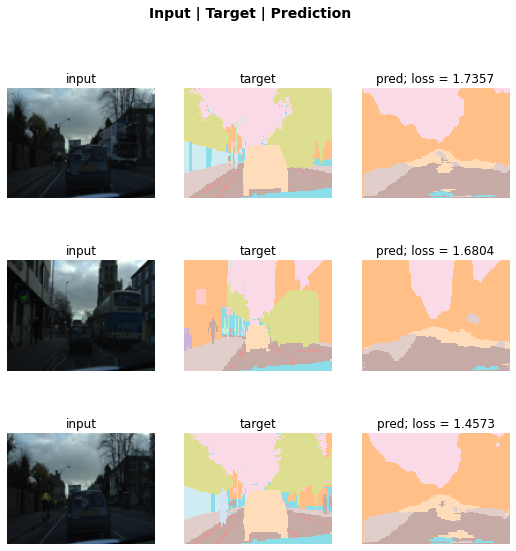

In [ ]:

interpre = SegmentationInterpretation.from_learner(learn)
interpre.plot_top_losses(k=3)
     

In [ ]:
from fastai.text import *
from fastai.text.all import *
!pip install fastai



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!rm -rf /root/.fastai/data/imdb_tok

In [ ]:
from fastai.text.all import *

path = untar_data(URLs.YELP_REVIEWS, force_download=True)

In [ ]:
!rm -rf /root/.fastai/data/yelp_review_full_csv_tok/

In [ ]:

from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.466138,0.397370,0.821200,03:15


epoch,train_loss,valid_loss,accuracy,time
0,0.315562,0.351460,0.838480,07:14
1,0.241969,0.204508,0.920720,07:16
2,0.200778,0.194489,0.922960,07:15
3,0.138190,0.192687,0.929280,07:15


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([2.4842e-05, 9.9998e-01]))

*#tabular_learner for DecisionTree*

In [ ]:
from fastai.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
dls = TabularDataLoaders.from_df(df, path=path, y_names="salary",
                                 cat_names = ['workclass', 'education', 'marital-status', 'occupation','relationship','race','sex','native-country'],
                                 cont_names = ['age', 'fnlwgt','education-num'],
                                 procs = [Categorify, Normalize])
learn = tabular_learner(dls, metrics=accuracy)
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,nan,nan,0.758753,00:03


In [ ]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,3.0,12.0,1.0,5.0,2.0,40.0,1.431554,-0.843814,-0.028573,1.0,0.0
1,5.0,8.0,3.0,2.0,1.0,2.0,2.0,20.0,0.548023,-0.136476,0.748340,0.0,0.0
2,5.0,1.0,3.0,4.0,1.0,5.0,2.0,40.0,-0.703647,0.156930,-1.582400,0.0,0.0
3,5.0,3.0,3.0,4.0,1.0,3.0,2.0,1.0,0.253512,1.395880,-0.805487,1.0,0.0
4,5.0,16.0,5.0,2.0,3.0,5.0,1.0,40.0,-1.439923,1.218387,-0.028573,0.0,0.0
5,5.0,6.0,1.0,9.0,2.0,5.0,2.0,40.0,1.652437,-0.280163,-2.359313,0.0,0.0
6,8.0,9.0,5.0,5.0,5.0,5.0,1.0,40.0,0.032629,-0.441924,0.359883,0.0,0.0
7,8.0,13.0,5.0,5.0,2.0,5.0,2.0,35.0,-0.850902,0.388821,1.525253,0.0,0.0
8,5.0,12.0,5.0,8.0,2.0,5.0,2.0,40.0,0.106257,-1.378002,-0.417030,0.0,0.0


In [ ]:
preds, y = learn.get_preds()

In [ ]:

from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
dls = CollabDataLoaders.from_df(ratings)
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,1.422221,1.190413,00:00
1,0.830983,0.694559,00:00
2,0.636285,0.667389,00:00
3,0.541653,0.658380,00:00
4,0.501497,0.656153,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,77.0,11.0,4.0,3.729166
1,99.0,59.0,3.5,4.107327
2,58.0,85.0,4.0,3.765981
3,69.0,6.0,4.0,4.572182
4,61.0,78.0,4.0,3.025367
5,93.0,76.0,3.0,3.926574
6,11.0,17.0,2.5,2.961821
7,17.0,13.0,1.0,4.043981
8,30.0,24.0,4.0,3.926615


In [ ]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
dls = CollabDataLoaders.from_df(ratings)
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fit_one_cycle(5,5e-3)




epoch,train_loss,valid_loss,time
0,1.428649,1.182744,00:00
1,0.836403,0.646119,00:00
2,0.620562,0.633105,00:00
3,0.514129,0.634506,00:00
4,0.463874,0.634280,00:00


In [ ]:
if ratings.empty:
    print("Dataframe is empty")
else:
    print("Dataframe has data")


Dataframe has data


In [ ]:
print(ratings.shape)


(6031, 4)


In [ ]:
print(path/'ratings.csv')


/root/.fastai/data/movie_lens_sample/ratings.csv


In [ ]:
import os
if not os.path.exists(path/'ratings.csv'):
    print("ratings.csv file not found, please download the dataset again.")


*#collab_learner used for Ranking!*

In [ ]:
min_rating, max_rating = ratings['rating'].min(), ratings['rating'].max()
dls = CollabDataLoaders.from_df(ratings, item_name='movieId', bs=64, val_idxs=range(len(ratings)-20000, len(ratings)))
learn = collab_learner(dls)
learn.fit_one_cycle(5, 5e-3)


epoch,train_loss,valid_loss,time
0,14.474939,11.643633,00:00
1,4.254550,0.719999,00:00
2,1.435588,0.687722,00:00
3,0.819024,0.674419,00:00
4,0.663846,0.677348,00:00


In [ ]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
dls = CollabDataLoaders.from_df(ratings)
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fit_one_cycle(5,5e-3)




epoch,train_loss,valid_loss,time
0,1.417279,1.174519,00:00
1,0.838668,0.687486,00:00
2,0.645905,0.647056,00:00
3,0.549477,0.641200,00:00
4,0.495517,0.640015,00:00


In [ ]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
dls = CollabDataLoaders.from_df(ratings)
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fit_one_cycle(5,5e-3)




epoch,train_loss,valid_loss,time
0,1.440234,1.109885,00:00
1,0.850826,0.701775,00:00
2,0.635689,0.662569,00:00
3,0.538861,0.654029,00:00
4,0.491416,0.651015,00:00


In [ ]:
from fastai.collab import *

path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
dls = CollabDataLoaders.from_df(ratings)
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fit_one_cycle(5,5e-3)



epoch,train_loss,valid_loss,time
0,1.436795,1.147078,00:00
1,0.854206,0.669816,00:00
2,0.634648,0.637894,00:00
3,0.536052,0.632434,00:00
4,0.491477,0.631419,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,92.0,63.0,4.0,4.412683
1,99.0,12.0,4.0,2.956088
2,83.0,69.0,4.5,4.297352
3,43.0,74.0,2.0,3.187579
4,75.0,47.0,3.0,4.512821
5,86.0,33.0,2.5,2.867855
6,70.0,30.0,3.5,3.697717
7,68.0,68.0,5.0,3.577602
8,85.0,98.0,5.0,4.827283
